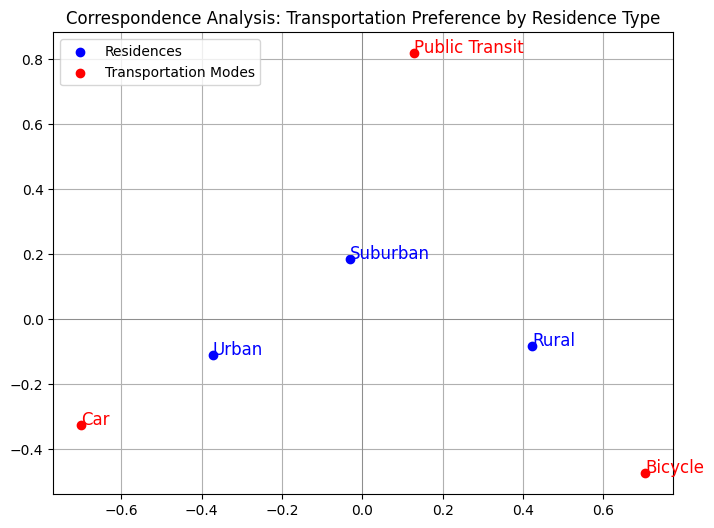

In [ ]:
# Import libraries after environment reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
# Example: Preferred Modes of Transportation by Residence Type
data2 = np.array ([
    [40, 10, 5], # Urban
    [20, 25, 10], # Suburban
    [5, 15, 30] # Rural
])
rows2 = ['Urban', 'Suburban', 'Rural' ]
cols2 = ['Car', 'Public Transit', 'Bicycle' ]
df2 = pd.DataFrame(data2, index=rows2, columns=cols2)
# Compute correspondence matrix
grand_total2 = df2.values.sum()
P2 = df2 / grand_total2
# Row and column masses
r2 = P2.sum(axis=1).values.reshape(-1, 1)
c2 = P2.sum(axis=0).values.reshape(1, -1)
# Expected frequencies under independence
E2 = r2 @ c2
# Standardized residuals (matrix for decomposition)
S2 = (P2 - E2) / np.sqrt(E2)
# Perform SVD
svd2 = TruncatedSVD(n_components=2)
U2 = svd2.fit_transform(S2)
V2 = svd2.components_.T
# Plotting
plt.figure(figsize=(8,6))
plt.scatter (U2[:, 0], U2[:, 1], label='Residences', color='blue' )
for i, label in enumerate(rows2) :
    plt.text (U2[i, 0], U2[i, 1], label, fontsize=12, color='blue' )
plt.scatter (V2[:, 0], V2[:, 1], label='Transportation Modes', color='red')
for j, label in enumerate(cols2) :
    plt.text (V2[j, 0], V2[j, 1], label, fontsize=12, color='red')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.legend()
plt.title('Correspondence Analysis: Transportation Preference by Residence Type')
plt.grid(True)
plt.show()

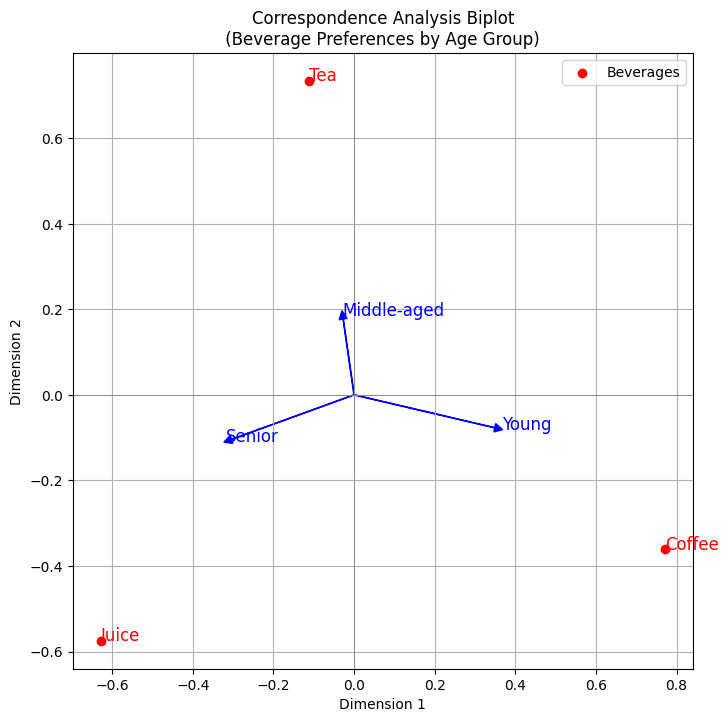

In [ ]:
# Import libraries after environment reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
data = np.array ([
    [25, 15, 5], # Young
    [10, 30, 10], # Middle-aged
    [5, 20, 25] # Senior
])
rows = ['Young', 'Middle-aged', 'Senior' ]
cols = ['Coffee', 'Tea', 'Juice' ]
df = pd.DataFrame(data, index=rows, columns=cols)
# Compute correspondence matrix
grand_total = df.values.sum()
P = df / grand_total
# Row and column masses
r = P.sum(axis=1).values.reshape(-1, 1)
c = P.sum(axis=0).values.reshape(1, -1)
# Expected frequencies under independence
E = r@c
# Standardized residuals (matrix for decomposition)
S = (P - E)/np.sqrt(E)
# Perform SVD
svd = TruncatedSVD(n_components=2)
U = svd.fit_transform(S)
V = svd.components_.T
# Plot as a biplot (rows as vectors, columns as points)
plt.figure(figsize=(8, 8))
origin = [0], [0]
# Plot column points
plt.scatter (V[:, 0], V[:, 1], color='red', label='Beverages')
for j, label in enumerate (cols) :
    plt.text (V[j, 0], V[j, 1], label, fontsize=12, color='red')
# Plot row vectors
for i, label in enumerate (rows) :
    plt.arrow(0, 0, U[i, 0], U[i, 1], head_width=0.02, head_length=0.02, color='blue')
    plt.text(U[i, 0]*1.05, U[i, 1]*1.05, label, fontsize=12, color='blue')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.title("Correspondence Analysis Biplot\n (Beverage Preferences by Age Group) ")
plt.grid(True)
plt.show()